In [1]:
from src.data import CICIDS2017, balanced_sample
from src.models import TabNetModel, TabPFNModel
from src.models import PreConfigured_LogisticRegression, PreConfigured_RandomForest, PreConfigured_LinearSVC, PreConfigured_DecisionTree, PreConfigured_KNeighbors
from src.pipelines import TTPipeline, plot_accuracies

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

### Data

In [2]:
dataset = CICIDS2017(pca=False, classes_mapping=False)
dataset.load()
dataset.balance_(n=2000, category_col="Label")
train, test = dataset.train_test_split(test_size=0.3)
X_train = train.drop(columns=["Label"]).values
y_train = train["Label"].values
X_test = test.drop(columns=["Label"]).values
y_test = test["Label"].values

2025-05-04 04:13:37,588 - INFO - Loading dataset...


In [3]:
train["Label"].value_counts()

Label
DDoS                         1456
DoS Hulk                     1417
SSH-Patator                  1412
DoS slowloris                1409
Bot                          1407
PortScan                     1401
DoS Slowhttptest             1382
DoS GoldenEye                1379
BENIGN                       1373
FTP-Patator                  1368
Web Attack  Brute Force       993
Web Attack  XSS               460
Infiltration                   21
Web Attack  Sql Injection      14
Heartbleed                      8
Name: count, dtype: int64

In [4]:
test["Label"].value_counts()

Label
FTP-Patator                  632
BENIGN                       627
DoS GoldenEye                621
DoS Slowhttptest             618
PortScan                     599
DoS slowloris                591
SSH-Patator                  588
DoS Hulk                     583
Bot                          546
DDoS                         544
Web Attack  Brute Force      477
Web Attack  XSS              192
Infiltration                  15
Web Attack  Sql Injection      7
Heartbleed                     3
Name: count, dtype: int64

### Models

#### Preparing

In [5]:
logreg = PreConfigured_LogisticRegression()
svc = PreConfigured_LinearSVC()
randomforest = PreConfigured_RandomForest()
kneighbors = PreConfigured_KNeighbors()
decision_tree = PreConfigured_DecisionTree()
tabnet = TabNetModel(pretrain=True)
tabpfn = TabPFNModel()

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


#### Training

##### Logistic Regression

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2025-04-22 08:18:54,919 - INFO - Cross-validation scores: [0.89158414 0.89072327 0.89167759 0.89089854 0.8988786 ]
2025-04-22 08:18:54,927 - INFO - Mean cross-validation score: 0.8928
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision 

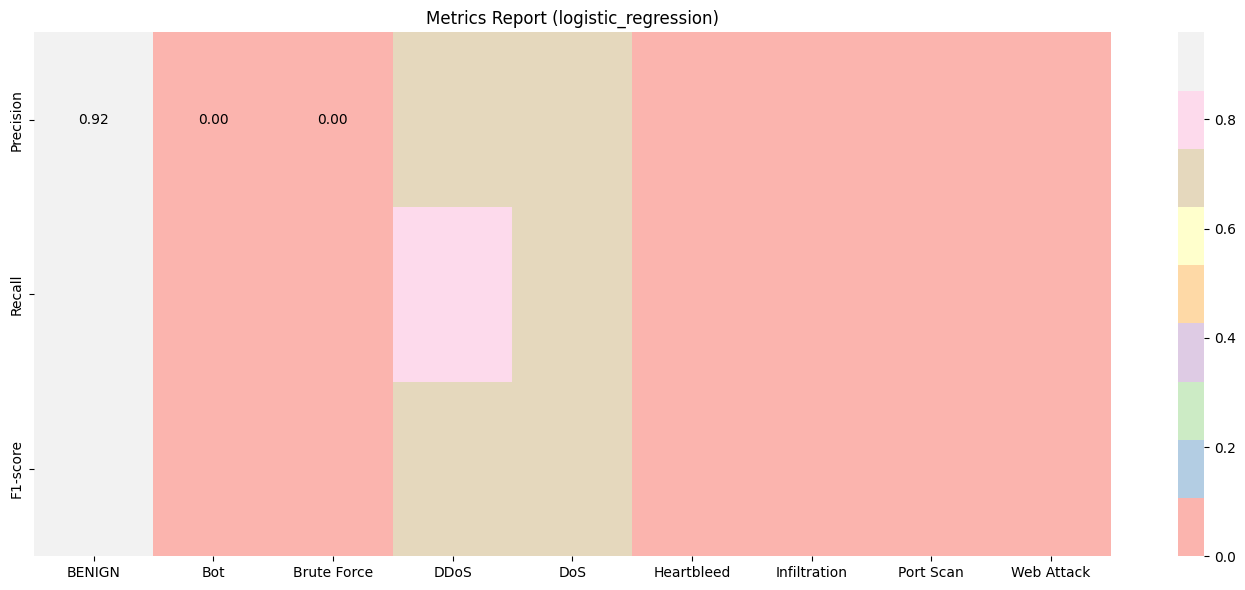

In [6]:
logreg_pl = TTPipeline(logreg)
logreg_pl.train(X_train, y_train, cv=5)
logreg_results = logreg_pl.evaluate(X_test, y_test)
logreg.save()

In [ ]:
print("Precision:", logreg_results["precision"])
print("Recall:", logreg_results["recall"])
print("F1-Score:", logreg_results["f1_score"])

[0.9245136902799396, 0.0, 0.0, 0.6859247405455016, 0.6850279527622485, 0.0, 0.0, 0.0, 0.0]
[0.9592439080660944, 0.0, 0.0, 0.7587005752661582, 0.7289887871618146, 0.0, 0.0, 0.0, 0.0]
[0.9415586443854443, 0.0, 0.0, 0.7204795451736498, 0.7063250134972383, 0.0, 0.0, 0.0, 0.0]


##### Support Vector Machine

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
2025-05-03 18:54:17,485 - INFO - Cross-validation scores: [0.75369458 0.78817734 0.80693069 0.82178218 0.76237624]
2025-05-03 18:54:17,485 - INFO - Mean cross-validation score: 0.7866
2025-05-03 18:54:17,546 - INFO - Model saved to models\ml\svc.zip


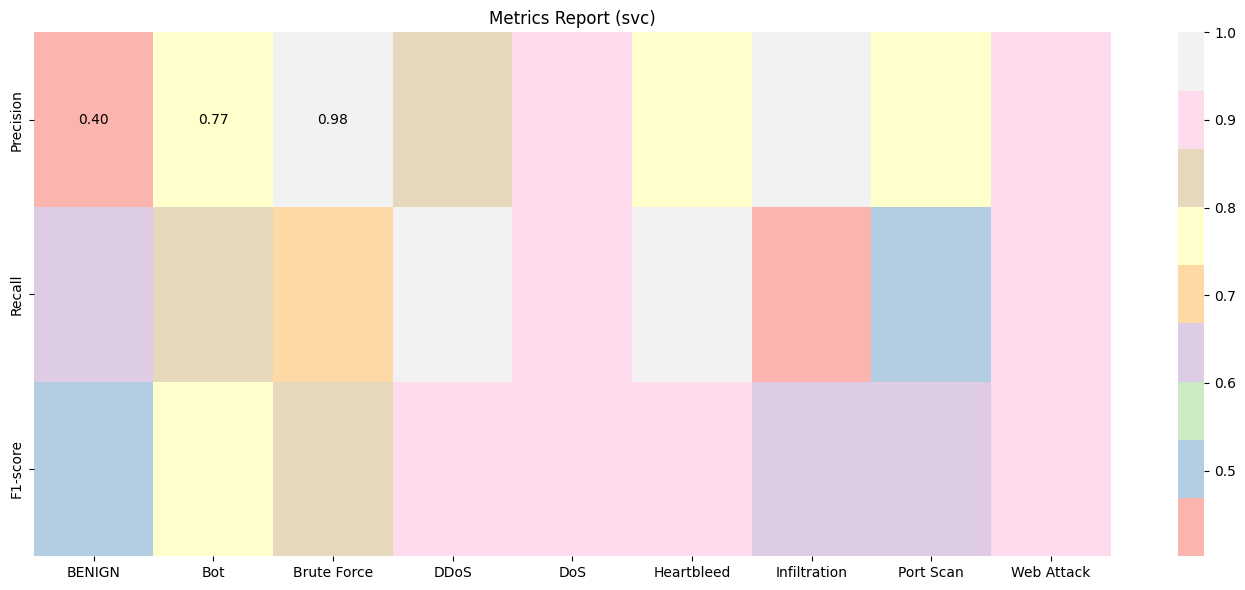

In [8]:
svc_pl = TTPipeline(svc)
svc_pl.train(X_train, y_train, cv=5)
svc_results = svc_pl.evaluate(X_test, y_test)
svc.save()

In [ ]:
print("Precision:", svc_results["precision"])
print("Recall:", svc_results["recall"])
print("F1-Score:", svc_results["f1_score"])

[0.925907408812724, 0.0, 0.9099740932642487, 0.8862456619108355, 0.911948116737341, 0.0, 0.0, 0.0, 0.09876543209876543]
[0.989577154343674, 0.0, 0.5025035765379113, 0.775568476793687, 0.7558664415423314, 0.0, 0.0, 0.0, 0.012403100775193798]
[0.9566841063848432, 0.0, 0.6474654377880185, 0.8272215069839556, 0.8266038624587847, 0.0, 0.0, 0.0, 0.02203856749311295]


##### Random Forest

2025-04-20 18:20:09,145 - INFO - Cross-validation scores: [0.99555689 0.99538698 0.99506415 0.99508963 0.99506131]
2025-04-20 18:20:09,146 - INFO - Mean cross-validation score: 0.9952
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: Un

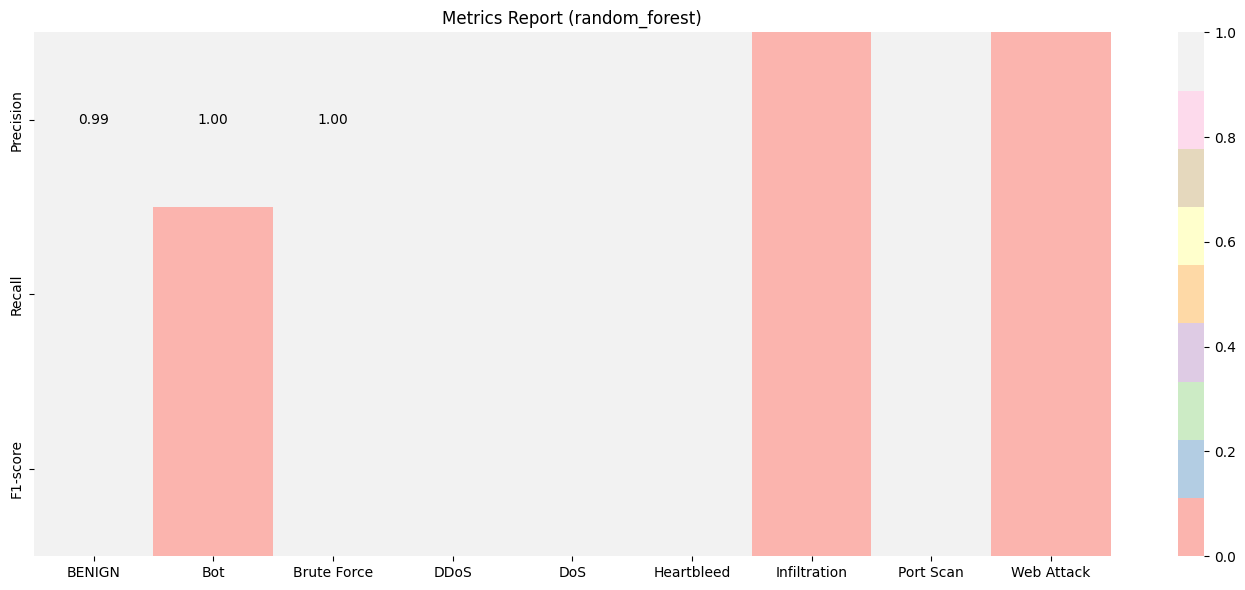

In [6]:
randomforest_pl = TTPipeline(randomforest)
randomforest_pl.train(X_train, y_train, cv=5)
randomforest_results = randomforest_pl.evaluate(X_test, y_test)
randomforest.save()

In [ ]:
print("Precision:", randomforest_results["precision"])
print("Recall:", randomforest_results["recall"])
print("F1-Score:", randomforest_results["f1_score"])

[0.9949715407572771, 1.0, 1.0, 0.999922015129065, 0.9986203480967879, 1.0, 0.0, 0.9897359097052271, 0.0]
[0.9994703878415044, 0.010101010101010102, 0.9734481521349121, 0.996812563165669, 0.9729776307172647, 1.0, 0.0, 0.9927456583864586, 0.0]
[0.997215890292272, 0.02, 0.9865454545454545, 0.9983648680214903, 0.9856322340741258, 1.0, 0.0, 0.9912384993872437, 0.0]


##### K-Neightbors

2025-04-20 18:57:12,902 - INFO - Cross-validation scores: [0.99190102 0.99174527 0.99178492 0.99138844 0.9917849 ]
2025-04-20 18:57:12,903 - INFO - Mean cross-validation score: 0.9917
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^

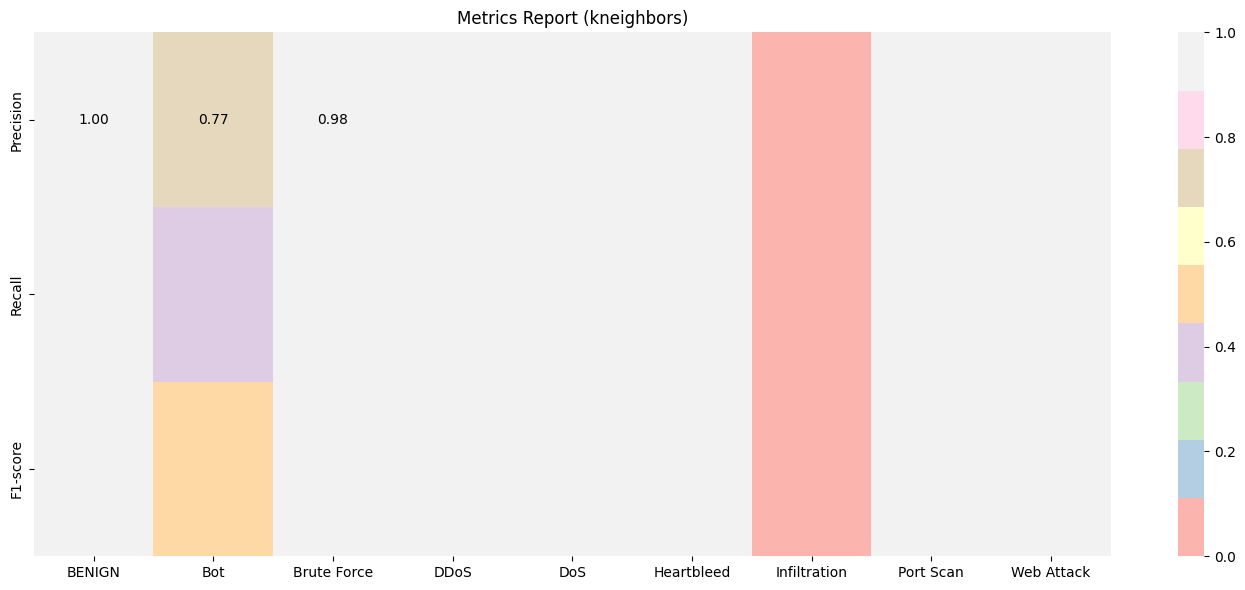

In [8]:
kneighbors_pl = TTPipeline(kneighbors)
kneighbors_pl.train(X_train, y_train, cv=5)
kneighbors_results = kneighbors_pl.evaluate(X_test, y_test)
kneighbors.save()

In [9]:
print("Precision:", kneighbors_results["precision"])
print("Recall:", kneighbors_results["recall"])
print("F1-Score:", kneighbors_results["f1_score"])

Precision: [0.996534582476937, 0.7678571428571429, 0.9799123447772097, 0.9846957148001441, 0.9821809792714, 1.0, 0.0, 0.9290989660265879, 0.9702970297029703]
Recall: [0.9947404582337991, 0.43434343434343436, 0.9626838894869035, 0.9920702790950789, 0.9831627201599283, 1.0, 0.0, 0.9679050340734228, 0.9074074074074074]
F1-Score: [0.9956367121089597, 0.5548387096774193, 0.9712217194570135, 0.9883692410962087, 0.9826716045129619, 1.0, 0.0, 0.948105081826012, 0.937799043062201]


##### Decision Tree

2025-04-20 19:10:08,454 - INFO - Cross-validation scores: [0.99494239 0.99495371 0.99488292 0.9949622  0.99501317]
2025-04-20 19:10:08,455 - INFO - Mean cross-validation score: 0.9950
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: Un

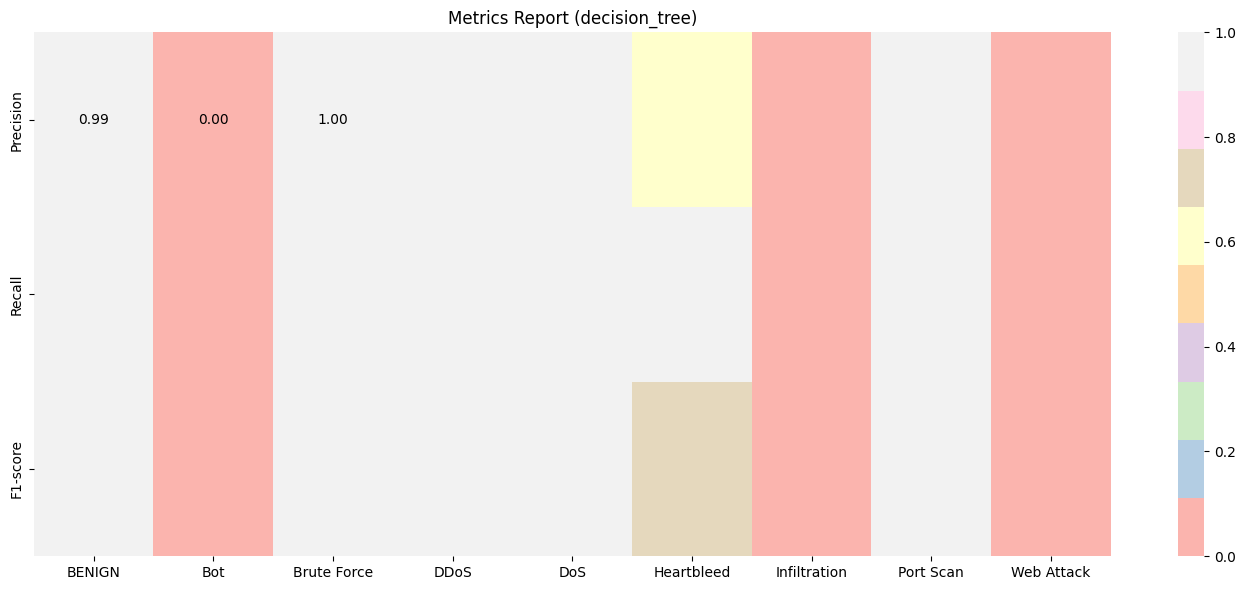

In [10]:
decision_tree_pl = TTPipeline(decision_tree)
decision_tree_pl.train(X_train, y_train, cv=5)
decision_tree_results = decision_tree_pl.evaluate(X_test, y_test)
decision_tree.save()

In [11]:
print("Precision:", decision_tree_results["precision"])
print("Recall:", decision_tree_results["recall"])
print("F1-Score:", decision_tree_results["f1_score"])

Precision: [0.994525876666846, 0.0, 1.0, 0.999298938020928, 0.9988081684929557, 0.6, 0.0, 0.9895152157235232, 0.0]
Recall: [0.99946084528009, 0.0, 0.9738069608898458, 0.9973308455777553, 0.9676524316685624, 1.0, 0.0, 0.9923792774968858, 0.0]
F1-Score: [0.9969872541336016, 0.0, 0.9867296855117251, 0.9983139218178517, 0.9829834911853784, 0.75, 0.0, 0.9909451771635539, 0.0]


##### TabNet

2025-04-20 19:10:11,303 - INFO - Augmenting data for TabNet...
2025-04-20 19:10:13,710 - INFO - Starting Data Augmentation...
2025-04-20 19:11:04,991 - INFO - Final counts after Data Augmentation:
{'BENIGN': 1467722,
 'Bot': 14949,
 'Brute Force': 70015,
 'DDoS': 447135,
 'DoS': 542888,
 'Heartbleed': 88,
 'Infiltration': 330,
 'Port Scan': 444675,
 'Web Attack': 16445}
2025-04-20 19:11:12,293 - INFO - Pretraining for TabNet...


epoch 0  | loss: 172974775.04273| val_0_unsup_loss_numpy: 18.65169906616211|  0:06:07s
epoch 1  | loss: 3829091890.55528| val_0_unsup_loss_numpy: 1.5839899778366089|  0:12:12s
epoch 2  | loss: 11906978323.73388| val_0_unsup_loss_numpy: 20573.755859375|  0:18:21s
epoch 3  | loss: 167401902185.8002| val_0_unsup_loss_numpy: 925.4644165039062|  0:24:31s
epoch 4  | loss: 1004502029.33156| val_0_unsup_loss_numpy: 24.288280487060547|  0:30:41s
epoch 5  | loss: 905151851.1068| val_0_unsup_loss_numpy: 12853.125|  0:36:50s
epoch 6  | loss: 384042701.99758| val_0_unsup_loss_numpy: 331.4256286621094|  0:43:02s
epoch 7  | loss: 13515405590.05679| val_0_unsup_loss_numpy: 9112.412109375|  0:49:14s
epoch 8  | loss: 265220877.02315| val_0_unsup_loss_numpy: 549090.75|  0:55:26s
epoch 9  | loss: 36286785132.79175| val_0_unsup_loss_numpy: 81.07424926757812|  1:01:37s
epoch 10 | loss: 36845515830.66233| val_0_unsup_loss_numpy: 100.88371276855469|  1:07:47s


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-04-20 20:25:11,104 - INFO - Training TabNet model...


epoch 11 | loss: 8216884451.0117| val_0_unsup_loss_numpy: 30.532800674438477|  1:13:57s

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_unsup_loss_numpy = 1.5839899778366089


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.09296 | val_accuracy: 0.77443 |  0:05:12s
epoch 1  | loss: 0.0518  | val_accuracy: 0.8927  |  0:10:27s
epoch 2  | loss: 0.04723 | val_accuracy: 0.80394 |  0:15:47s
epoch 3  | loss: 0.05017 | val_accuracy: 0.90022 |  0:21:05s
epoch 4  | loss: 0.04753 | val_accuracy: 0.77076 |  0:26:21s
epoch 5  | loss: 0.04619 | val_accuracy: 0.79598 |  0:31:35s
epoch 6  | loss: 0.0439  | val_accuracy: 0.76397 |  0:36:58s
epoch 7  | loss: 0.04424 | val_accuracy: 0.81441 |  0:42:16s
epoch 8  | loss: 0.0454  | val_accuracy: 0.80237 |  0:47:32s
epoch 9  | loss: 0.04071 | val_accuracy: 0.75612 |  0:52:50s
epoch 10 | loss: 0.04665 | val_accuracy: 0.84316 |  0:58:11s
epoch 11 | loss: 0.0387  | val_accuracy: 0.88494 |  1:03:32s
epoch 12 | loss: 0.03451 | val_accuracy: 0.83881 |  1:08:49s
epoch 13 | loss: 0.03526 | val_accuracy: 0.73778 |  1:14:05s
epoch 14 | loss: 0.03182 | val_accuracy: 0.67898 |  1:19:26s
epoch 15 | loss: 0.03591 | val_accuracy: 0.86448 |  1:24:48s
epoch 16 | loss: 0.03509

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Successfully saved model at models\tabnet\tabnet.zip


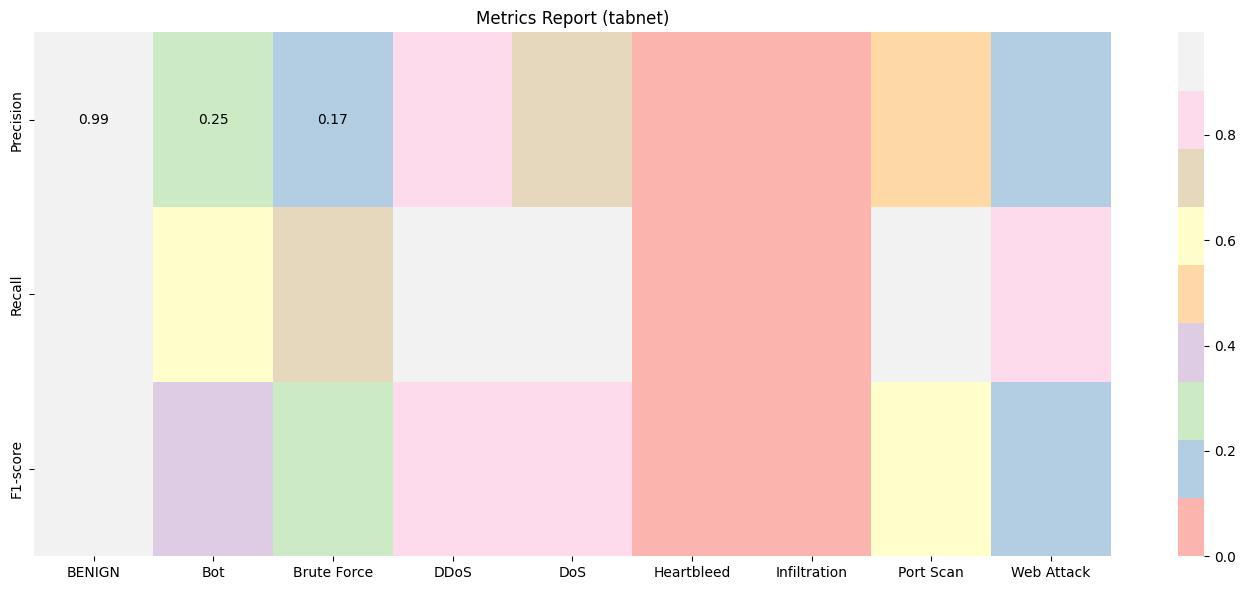

In [ ]:
tabnet_pl = TTPipeline(tabnet)
tabnet_pl.train(X_train, y_train, X_test, y_test, augmentation=True)
tabnet_results = tabnet_pl.evaluate(X_test, y_test)
tabnet.save()

In [ ]:
print("Accuracy:", tabnet_results["accuracy"])
print("Precision:", tabnet_results["precision"])
print("Recall:", tabnet_results["recall"])
print("F1-Score:", tabnet_results["f1_score"])

[0.9925327027142188, 0.2503467406380028, 0.16768802228412255, 0.7804227884198128, 0.7725970787317421, 0.0, 0.0, 0.48139283371451874, 0.12382234185733512]
[0.8891281597806483, 0.6077441077441077, 0.7560100466451382, 0.9786985928632512, 0.9343570123737635, 0.0, 0.0, 0.9947973913680662, 0.8518518518518519]
[0.9379891914383843, 0.35461689587426326, 0.27449192287649815, 0.868386562737118, 0.8458124351604122, 0.0, 0.0, 0.6488165645124676, 0.21621621621621623]


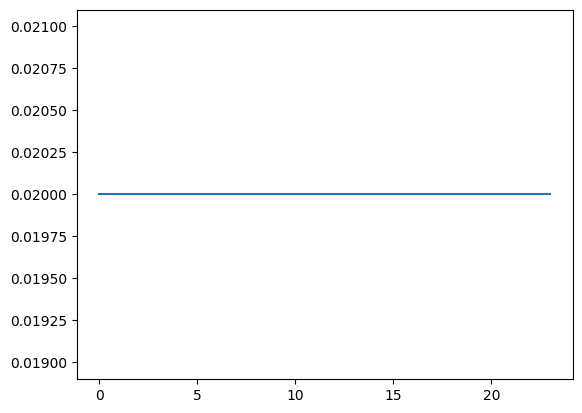

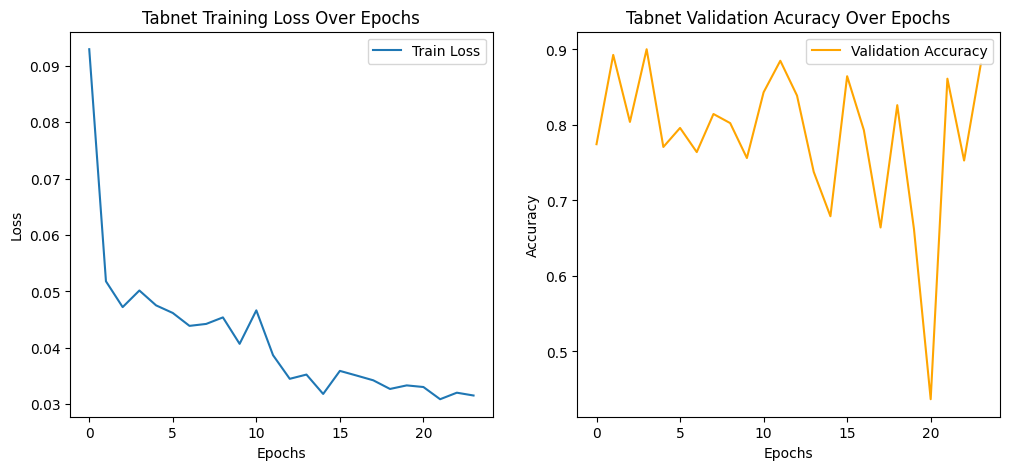

0.900221881859473

In [ ]:
tabnet.plot_metrics()

##### TabPFN

In [6]:
smaller_train = balanced_sample(train, "Label",2000)
new_x = smaller_train.drop(columns=["Label"]).values
new_y = smaller_train["Label"].values

In [7]:
smaller_train["Label"].value_counts()

Label
DDoS                         1456
DoS Hulk                     1417
SSH-Patator                  1412
DoS slowloris                1409
Bot                          1407
PortScan                     1401
DoS Slowhttptest             1382
DoS GoldenEye                1379
BENIGN                       1373
FTP-Patator                  1368
Web Attack  Brute Force       993
Web Attack  XSS               460
Infiltration                   21
Web Attack  Sql Injection      14
Heartbleed                      8
Name: count, dtype: int64

In [8]:
tabpfn_pl = TTPipeline(tabpfn)
tabpfn_pl.train(new_x, new_y, augmentation=True)

2025-05-04 04:13:47,454 - INFO - Performing SMOTE for data augmentation...
2025-05-04 04:13:47,510 - INFO - Starting Data Augmentation...
2025-05-04 04:13:47,722 - INFO - Final counts after Data Augmentation:
{'BENIGN': 1373,
 'Bot': 1407,
 'DDoS': 1456,
 'DoS GoldenEye': 1379,
 'DoS Hulk': 1417,
 'DoS Slowhttptest': 1382,
 'DoS slowloris': 1409,
 'FTP-Patator': 1368,
 'Heartbleed': 88,
 'Infiltration': 231,
 'PortScan': 1401,
 'SSH-Patator': 1412,
 'Web Attack  Brute Force': 993,
 'Web Attack  Sql Injection': 154,
 'Web Attack  XSS': 460}
2025-05-04 04:13:47,724 - INFO - Fitting TabPNF model...
2025-05-04 04:13:47,730 - INFO - Training ManyClassClassifier extension
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warn

Using codebook with 24 estimators and 15 classes


In [ ]:
tabpfn_results = tabpfn_pl.evaluate(X_test, y_test)
tabpfn.save()

2025-05-04 04:15:53,568 - INFO - TabPFN predicting labels...
2025-05-04 04:15:53,568 - INFO - Starting batch prediction with batch size of 20000... (Total of 6643 samples to predict)
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tabpfn\classifier.py:421: UserWarning: Number of samples 15930 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tabpfn\classifier.py:421: UserWarning: Number of samples 15930 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tabpfn\classifier.py:421: UserWarning: Number of samples 15930 is greater than the maximum Number of samples 10000 supported by the mo

In [ ]:
print("Accuracy:", tabpfn_results["accuracy"])
print("Precision:", tabpfn_results["precision"])
print("Recall:", tabpfn_results["recall"])
print("F1-Score:", tabpfn_results["f1_score"])

0.5968058880274394

#### From loaded

2025-05-03 20:01:03,715 - INFO - Model loaded from models\ml\logistic_regression_no_pca_no_mapping.zip
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wit

0.8967264827033906
[0.9250514601237486, 0.0, 0.639104643222943, 0.8191387559808613, 0.7828787163756489, 0.0, 0.9068901303538175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.9637331746716068, 0.0, 0.7762745250498925, 0.2793733681462141, 0.7954009320879922, 0.0, 0.2969512195121951, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.943996222731087, 0.0, 0.70104275164722, 0.4166463859819908, 0.7890901480269417, 0.0, 0.44740468534680755, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


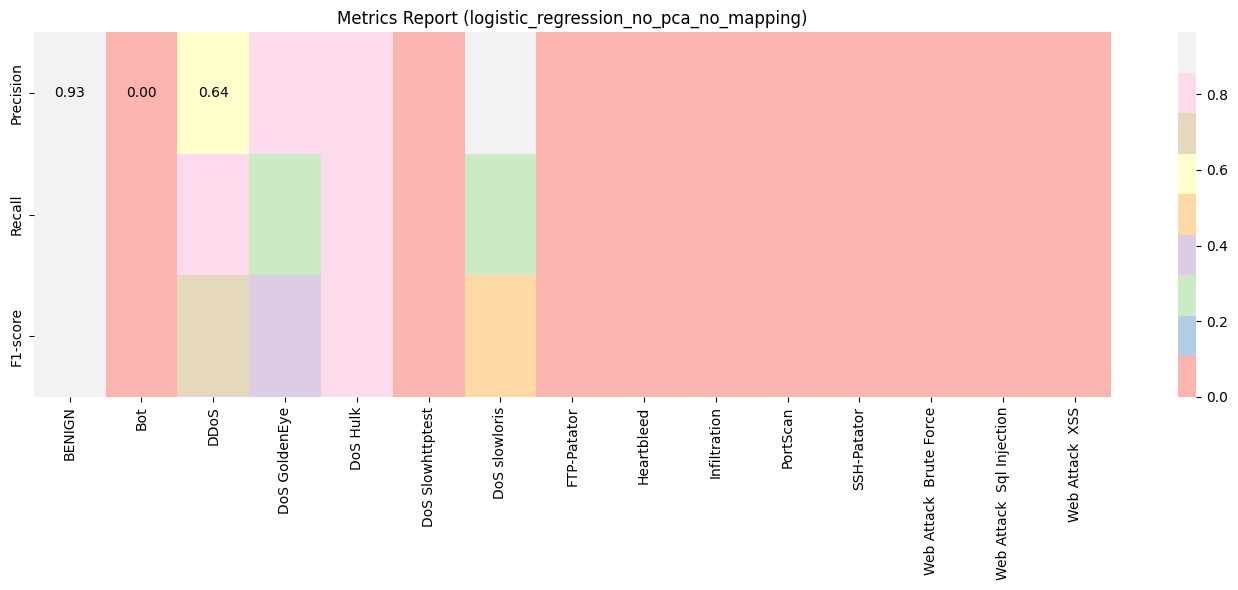

In [14]:
logreg.name = "logistic_regression_no_pca_no_mapping"
logreg.load()
logreg_pl = TTPipeline(logreg)
logreg_results = logreg_pl.evaluate(X_test, y_test)
print(logreg_results["accuracy"])
print(logreg_results["precision"])
print(logreg_results["recall"])
print(logreg_results["f1_score"])


In [ ]:
svc.load()
svc_pl = TTPipeline(svc)
svc_results = svc_pl.evaluate(X_test, y_test)
svc_results["accuracy"]

In [ ]:
randomforest.load()
randomforest_pl = TTPipeline(randomforest)
randomforest_results = randomforest_pl.evaluate(X_test, y_test)
randomforest_results["accuracy"]

2025-05-02 20:00:28,801 - INFO - Model loaded from models\ml\kneighbors_pca_mapping.zip
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subpro

0.9948249591322423
[0.9967406056021536, 0.8732394366197183, 0.9848372781065089, 0.9991743640022706, 0.9975336945949701, 0.0, 0.0, 0.9418795321211237, 0.983739837398374]
[0.9971145683298835, 0.5535714285714286, 0.9815702174714338, 0.9989939378305173, 0.9954762111101482, 0.0, 0.0, 0.9465011534658904, 0.9572784810126582]
[0.9969275518962393, 0.6775956284153005, 0.9832010337825364, 0.9990841427705326, 0.9965038908311717, 0.0, 0.0, 0.9441846873173583, 0.9703287890938251]


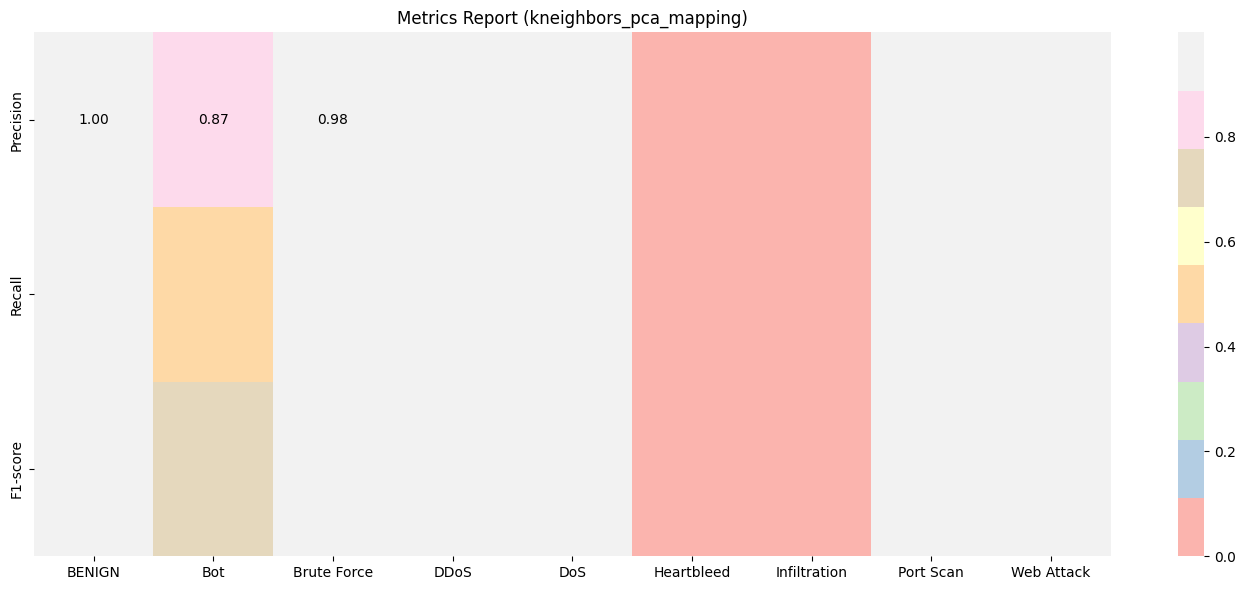

In [12]:
kneighbors.name = "kneighbors_pca_mapping"
kneighbors.load()
kneighbors_pl = TTPipeline(kneighbors)
kneighbors_results = kneighbors_pl.evaluate(X_test, y_test)
print(kneighbors_results["accuracy"])
print(kneighbors_results["precision"])
print(kneighbors_results["recall"])
print(kneighbors_results["f1_score"])

2025-05-02 20:10:22,359 - INFO - Model loaded from models\ml\decision_tree_pca_mapping.zip
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predict

0.9879663120169048
[0.9901946376282559, 0.0, 1.0, 0.9891475266156265, 0.982745713165306, 1.0, 1.0, 0.9441922267744436, 0.0]
[0.9961686554683302, 0.0, 0.7007003317360855, 0.9898619889075196, 0.9556114048011093, 0.5, 0.1111111111111111, 0.9367241568713611, 0.0]
[0.9931726630734983, 0.0, 0.824013870827915, 0.9895046287939349, 0.9689886376618013, 0.6666666666666666, 0.2, 0.9404433660527186, 0.0]


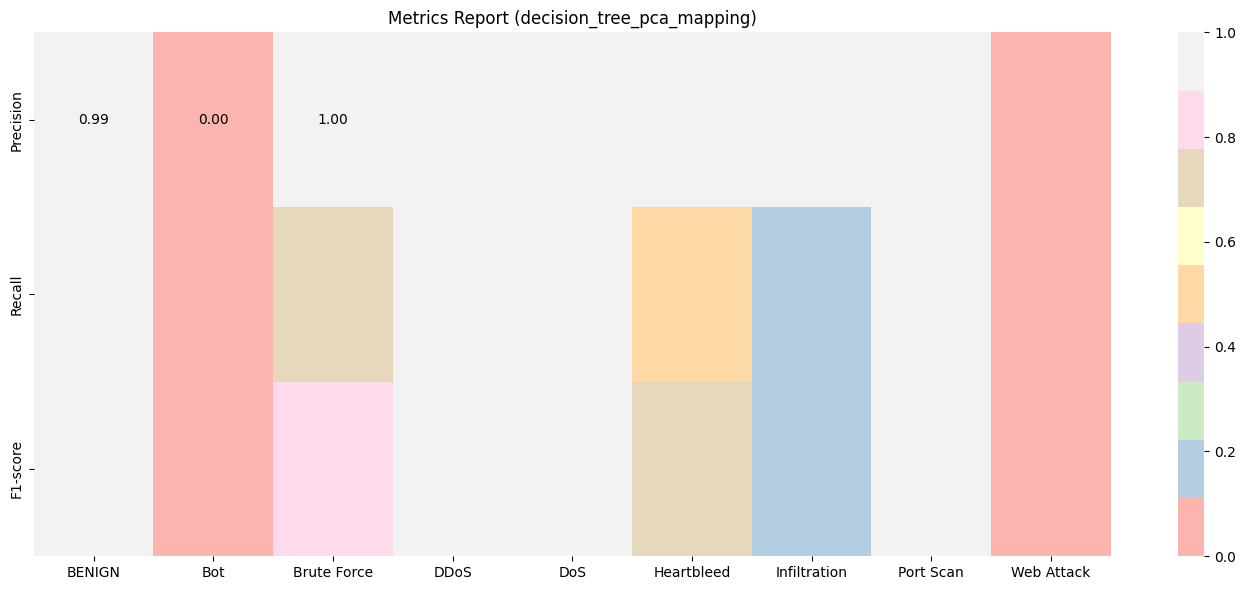

In [13]:
decision_tree.name = "decision_tree_pca_mapping"
decision_tree.load()
decision_tree_pl = TTPipeline(decision_tree)
decision_tree_results = decision_tree_pl.evaluate(X_test, y_test)
print(decision_tree_results["accuracy"])
print(decision_tree_results["precision"])
print(decision_tree_results["recall"])
print(decision_tree_results["f1_score"])

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


0.9005060069326518
[0.9924884878490244, 0.26413793103448274, 0.16927062252084513, 0.7799469255929727, 0.7716079257530035, 0.0, 0.2, 0.48158579628507253, 0.11525346669697659]
[0.8895232884729772, 0.6415410385259631, 0.7491938373342888, 0.9775680693069307, 0.9344101220437151, 0.0, 0.1111111111111111, 0.9953210772574881, 0.8380165289256198]
[0.9381892659655574, 0.37420615534929164, 0.27614896988906495, 0.8676468905543795, 0.845241065302813, 0.0, 0.14285714285714285, 0.6491032063526387, 0.2026378896882494]


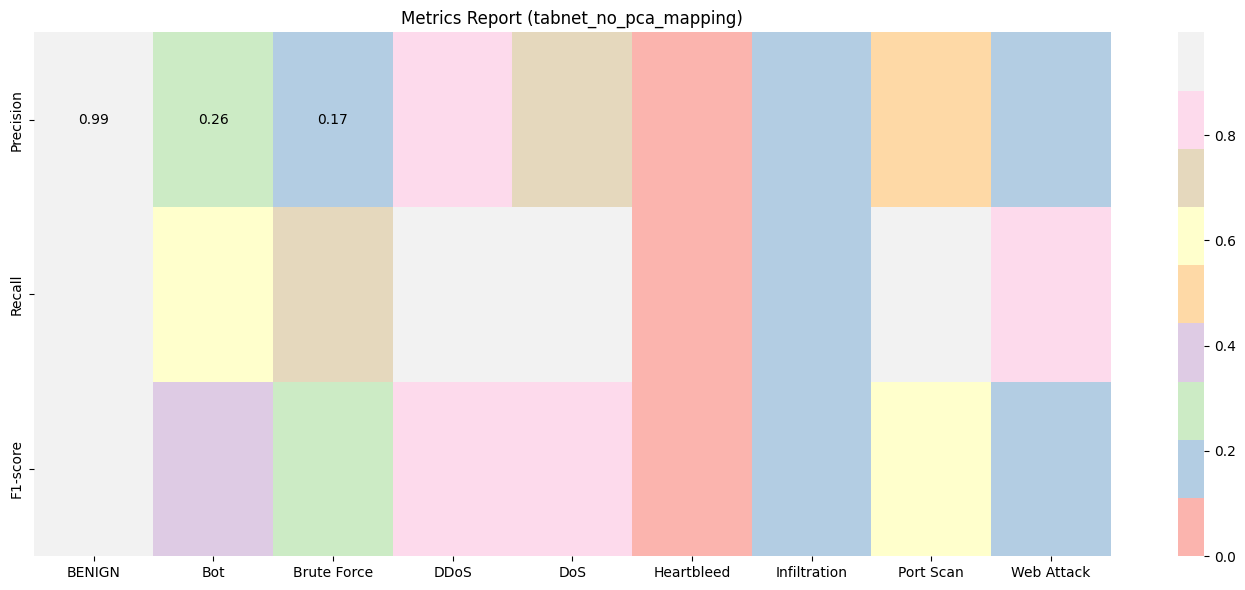

In [10]:
tabnet.name = "tabnet_no_pca_mapping"
tabnet.load()
tabnet_pl = TTPipeline(tabnet)
tabnet_results = tabnet_pl.evaluate(X_test, y_test)
print(tabnet_results["accuracy"])
print(tabnet_results["precision"])
print(tabnet_results["recall"])
print(tabnet_results["f1_score"])

In [ ]:
tabpfn.load()
tabpfn_pl = TTPipeline(tabpfn)
tabpfn_results = tabpfn_pl.evaluate(X_test, y_test)
tabnet_results["accuracy"]

#### Performance

In [10]:
accuracies = [
    logreg_results["accuracy"],
    # svc_results["accuracy"],
    # randomforest_results["accuracy"],
    # kneighbors_results["accuracy"],
    # decision_tree_results["accuracy"],
    # tabnet_results["accuracy"],
    # tabpfn_results["accuracy"]
]

models_names = [
    'Logistic Regression',
    # 'SVM',
    # "Random Forest",
    # "KNeighbors",
    # "Decision Tree",
    # "TabNet",
    # "TabPFN"
]

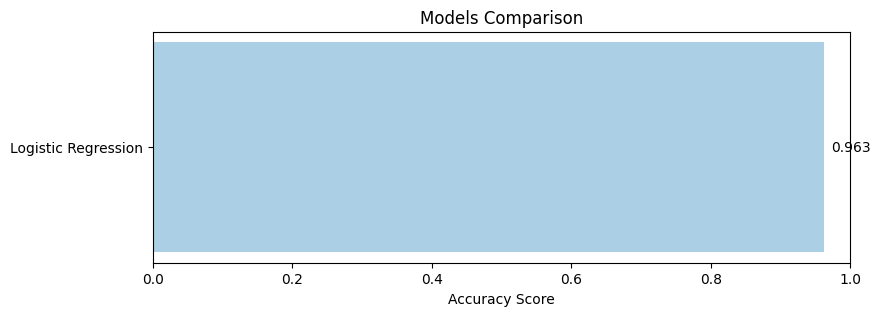

In [11]:
accuracy_plot = plot_accuracies(accuracies, models_names)